In [2]:
# Install RDKit
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 40.4 MB/s eta 0:00:00


In [1]:
#Upload the dataset files
from google.colab import files
uploaded = files.upload()

Saving FDA-approved-Drug-Library_noPPI_80%training_set.sdf to FDA-approved-Drug-Library_noPPI_80%training_set.sdf
Saving LVcleaned_2p2idb_80%training_set.sdf to LVcleaned_2p2idb_80%training_set.sdf


In [3]:
# Import the necessary libraries
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from rdkit import DataStructs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[18:48:54] Skipping unrecognized collection type at line 93736: MDLV30/STERAC1 BONDS=(1 15)
[18:48:55] 

****
Post-condition Violation
Element '?' not found
Violation occurred on line 93 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[18:48:55] ERROR: Element '?' not found
[18:48:55] ERROR: moving to the beginning of the next molecule
[18:48:55] skipping block at line 150704: 'BEGIN BOND'
[18:48:55] skipping block at line 187813: 'BEGIN BOND'
[18:48:55] skipping block at line 188798: 'BEGIN BOND'
[18:48:55] skipping block at line 190243: 'BEGIN BOND'
[18:48:55] skipping block at line 191098: 'BEGIN BOND'
[18:48:55] skipping block at line 196306: 'BEGIN BOND'
[18:48:55] 

****
Post-condition Violation
Element '?' not found
Violation occurred on line 93 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[18:48:55] ERROR: Element '?' not found

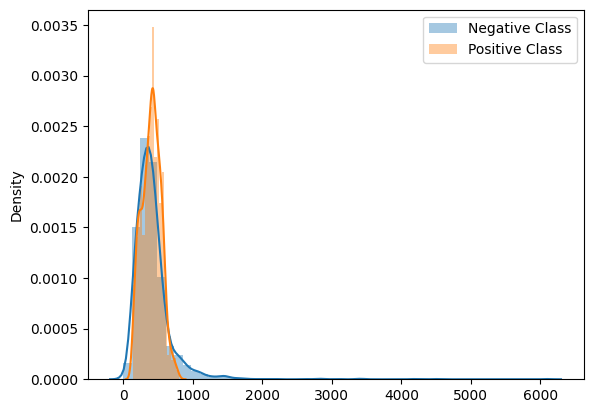

In [4]:
# Define the paths to the SDF files containing the molecules for each class
negative_class_path = "/content/FDA-approved-Drug-Library_noPPI_80%training_set.sdf"
positive_class_path = "/content/LVcleaned_2p2idb_80%training_set.sdf"

# Read the SDF files into a list of molecules for each class
negative_class = [mol for mol in Chem.SDMolSupplier(negative_class_path)]
positive_class = [mol for mol in Chem.SDMolSupplier(positive_class_path)]

# Calculate the average molecular weight for the negative class
weights_negative_class = []
for mol in negative_class:
    if mol is not None:
        weight = Descriptors.MolWt(mol)
        weights_negative_class.append(weight)
avg_weight_negative_class = np.mean(weights_negative_class)

# Calculate the average molecular weight for the positive class
weights_positive_class = []
for mol in positive_class:
    if mol is not None:
        weight = Descriptors.MolWt(mol)
        weights_positive_class.append(weight)
avg_weight_positive_class = np.mean(weights_positive_class)

# Create a seaborn plot to visualize the distributions of average weights for each class
sns.distplot(weights_negative_class, label='Negative Class')
sns.distplot(weights_positive_class, label='Positive Class')
plt.legend()

[02:58:50] Skipping unrecognized collection type at line 93736: MDLV30/STERAC1 BONDS=(1 15)
[02:58:50] 

****
Post-condition Violation
Element '?' not found
Violation occurred on line 93 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[02:58:50] ERROR: Element '?' not found
[02:58:50] ERROR: moving to the beginning of the next molecule
[02:58:50] skipping block at line 150704: 'BEGIN BOND'
[02:58:50] skipping block at line 187813: 'BEGIN BOND'
[02:58:50] skipping block at line 188798: 'BEGIN BOND'
[02:58:50] skipping block at line 190243: 'BEGIN BOND'
[02:58:50] skipping block at line 191098: 'BEGIN BOND'
[02:58:50] skipping block at line 196306: 'BEGIN BOND'
[02:58:50] 

****
Post-condition Violation
Element '?' not found
Violation occurred on line 93 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[02:58:50] ERROR: Element '?' not found

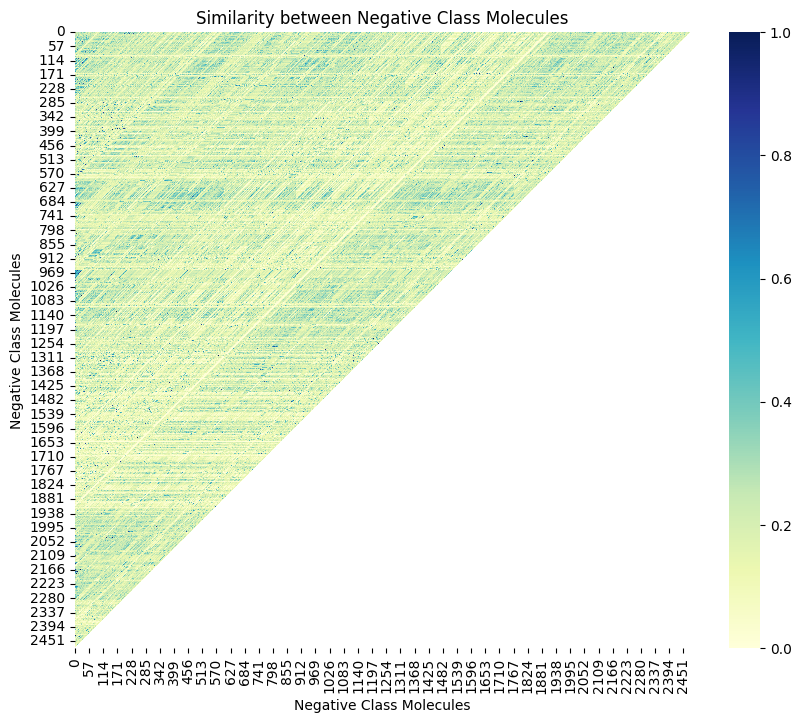

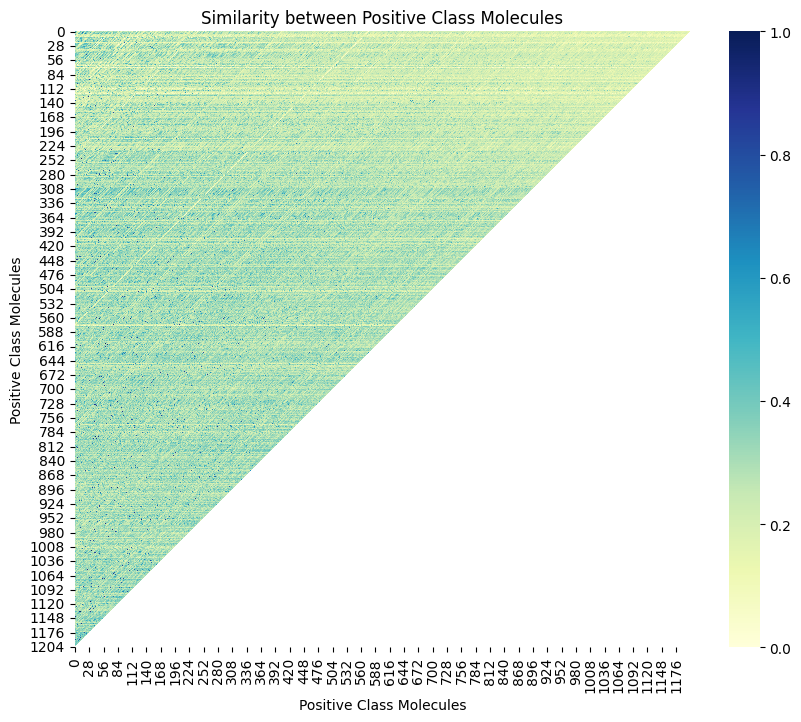

In [7]:
# Load negative and positive class molecules from SDF files
neg_sdf = "/content/FDA-approved-Drug-Library_noPPI_80%training_set.sdf"
pos_sdf = "/content/LVcleaned_2p2idb_80%training_set.sdf"

neg_molecules = [mol for mol in Chem.SDMolSupplier(neg_sdf) if mol is not None]
pos_molecules = [mol for mol in Chem.SDMolSupplier(pos_sdf) if mol is not None]

# Calculate fingerprints for negative and positive class molecules
neg_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in neg_molecules]
pos_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in pos_molecules]

# Calculate similarities between negative class molecules
neg_similarity_matrix = []
for i in range(len(neg_molecules)):
    row = []
    for j in range(i+1, len(neg_molecules)):
        similarity = DataStructs.DiceSimilarity(neg_fps[i], neg_fps[j])
        row.append(similarity)
    neg_similarity_matrix.append(row)

# Create a pandas DataFrame from the negative similarity matrix
neg_df = pd.DataFrame(neg_similarity_matrix)

# Calculate similarities between positive class molecules
pos_similarity_matrix = []
for i in range(len(pos_molecules)):
    row = []
    for j in range(i+1, len(pos_molecules)):
        similarity = DataStructs.DiceSimilarity(pos_fps[i], pos_fps[j])
        row.append(similarity)
    pos_similarity_matrix.append(row)

# Create a pandas DataFrame from the positive similarity matrix
pos_df = pd.DataFrame(pos_similarity_matrix)

# Create a heatmap for negative class molecules
plt.figure(figsize=(10, 8))
sns.heatmap(neg_df, cmap="YlGnBu", square=True)
plt.title("Similarity between Negative Class Molecules")
plt.xlabel("Negative Class Molecules")
plt.ylabel("Negative Class Molecules")
plt.show()

# Create a heatmap for positive class molecules
plt.figure(figsize=(10, 8))
sns.heatmap(pos_df, cmap="YlGnBu", square=True)
plt.title("Similarity between Positive Class Molecules")
plt.xlabel("Positive Class Molecules")
plt.ylabel("Positive Class Molecules")
plt.show()


[03:04:10] Skipping unrecognized collection type at line 93736: MDLV30/STERAC1 BONDS=(1 15)
[03:04:11] 

****
Post-condition Violation
Element '?' not found
Violation occurred on line 93 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[03:04:11] ERROR: Element '?' not found
[03:04:11] ERROR: moving to the beginning of the next molecule
[03:04:11] skipping block at line 150704: 'BEGIN BOND'
[03:04:11] skipping block at line 187813: 'BEGIN BOND'
[03:04:11] skipping block at line 188798: 'BEGIN BOND'
[03:04:11] skipping block at line 190243: 'BEGIN BOND'
[03:04:11] skipping block at line 191098: 'BEGIN BOND'
[03:04:11] skipping block at line 196306: 'BEGIN BOND'
[03:04:11] 

****
Post-condition Violation
Element '?' not found
Violation occurred on line 93 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[03:04:11] ERROR: Element '?' not found

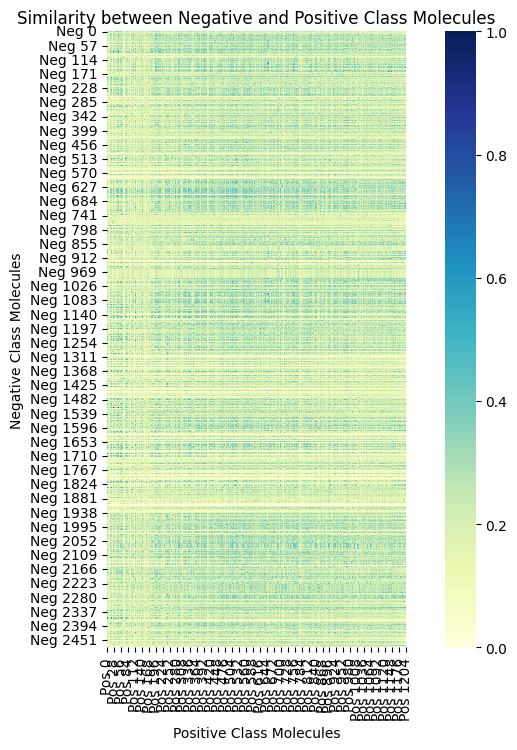

In [8]:
# Load negative and positive class molecules from SDF files
neg_sdf = "/content/FDA-approved-Drug-Library_noPPI_80%training_set.sdf"
pos_sdf = "/content/LVcleaned_2p2idb_80%training_set.sdf"

neg_molecules = [mol for mol in Chem.SDMolSupplier(neg_sdf) if mol is not None]
pos_molecules = [mol for mol in Chem.SDMolSupplier(pos_sdf) if mol is not None]

# Calculate fingerprints for negative and positive class molecules
neg_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in neg_molecules]
pos_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in pos_molecules]

# Calculate similarities between negative and positive class molecules
similarity_matrix = []
for i in range(len(neg_molecules)):
    row = []
    for j in range(len(pos_molecules)):
        similarity = DataStructs.DiceSimilarity(neg_fps[i], pos_fps[j])
        row.append(similarity)
    similarity_matrix.append(row)

# Create a pandas DataFrame from the similarity matrix
df = pd.DataFrame(similarity_matrix, index=[f"Neg {i}" for i in range(len(neg_molecules))], columns=[f"Pos {i}" for i in range(len(pos_molecules))])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap="YlGnBu", square=True)
plt.title("Similarity between Negative and Positive Class Molecules")
plt.xlabel("Positive Class Molecules")
plt.ylabel("Negative Class Molecules")
plt.show()
